<a href="https://colab.research.google.com/github/alvinhh01/CNNclassificationFashion/blob/main/CA1_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from re import X
# Plot mnist instances
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import learning_curve
from keras.datasets import fashion_mnist



# load (downloaded if needed) the MNIST dataset

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.
# https://complex-valued-neural-networks.readthedocs.io/en/latest/code_examples/fashion_mnist.html

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)





0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [ ]:
# Fashion MNIST class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert one-hot to label if needed
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_labels = np.argmax(y_train, axis=1)
else:
    y_labels = y_train

# Get one sample per class
samples_per_class = {}
for img, label in zip(X_train, y_labels):
    if label not in samples_per_class:
        samples_per_class[label] = img
    if len(samples_per_class) == 10:
        break

# Plot the images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples_per_class[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.tight_layout()
plt.show()


In [ ]:
# Larger CNN Model
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

# fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') #this will be the input shape in the subsequent model

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) #input_Shape is the shape of the data
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten()) #flatten to 1 dimensional tensor
model.add(Dense(32, activation='relu')) # the number of nodes
model.add(Dense(64, activation='relu')) #hidden layer
model.add(Dense(num_classes, activation='softmax')) # fully connected layer probablities of each output class, which class is more likely
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])



# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, batch_size=200) #batch size = how many samples are pass and process by the network every literation, going to train 10 times before the total training process, shuffle is by default (usually shuffle = true), verbose can be set 1 or 2, verbose - 2 can see the highest level of output
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 177ms/step - accuracy: 0.5531 - loss: 1.2485 - val_accuracy: 0.8099 - val_loss: 0.5172
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 37s 125ms/step - accuracy: 0.8093 - loss: 0.5131 - val_accuracy: 0.8462 - val_loss: 0.4313
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 131ms/step - accuracy: 0.8396 - loss: 0.4355 - val_accuracy: 0.8597 - val_loss: 0.3921
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 126ms/step - accuracy: 0.8553 - loss: 0.3987 - val_accuracy: 0.8670 - val_loss: 0.3690
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.8648 - loss: 0.3705 - val_accuracy: 0.8721 - val_loss: 0.3493
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 125ms/step - accuracy: 0.8696 - loss: 0.3545 - val_accuracy: 0.8789 - val_loss: 0.3318
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.8782 - loss: 0.3321 - val_accuracy: 0.8810 - val_loss: 0.3227
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.8826 - loss: 0

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,919 (230.16 KB)

 Trainable params: 19,639 (76.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,280 (153.44 KB)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 1. Predict
y_pred = model.predict(X_test)  # Shape: (10000, 10)

# 2. Convert predictions to class labels (e.g., 0–9)
y_pred_classes = np.argmax(y_pred, axis=1)

# 3. Convert one-hot encoded y_test to class labels if needed
if y_test.ndim == 2:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test  # Already in label format



# 4. Now use the correct inputs
print(confusion_matrix(y_test_labels, y_pred_classes))

print('\n')

print(classification_report(y_test_labels, y_pred_classes, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[833   1  20  27   4   2  99   0  14   0]
 [  2 974   0  17   3   0   2   0   2   0]
 [ 13   0 837  14  66   0  66   0   4   0]
 [ 12   2  11 918  21   0  32   0   4   0]
 [  1   0  92  41 787   0  77   0   2   0]
 [  0   0   0   0   0 974   0  22   0   4]
 [148   2  80  23  68   0 661   0  18   0]
 [  0   0   0   0   0   9   0 986   0   5]
 [  1   0   3   5   4   1   1   5 980   0]
 [  0   0   0   0   0   7   1  66   0 926]]


              precision    recall  f1-score   support

 T-shirt/top       0.82      0.83      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.84      0.82      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.83      0.79      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.70      0.66      0.68      1000
     Sneaker       0.91      0.99      0.95      1000
         Bag       0.96      0.98      

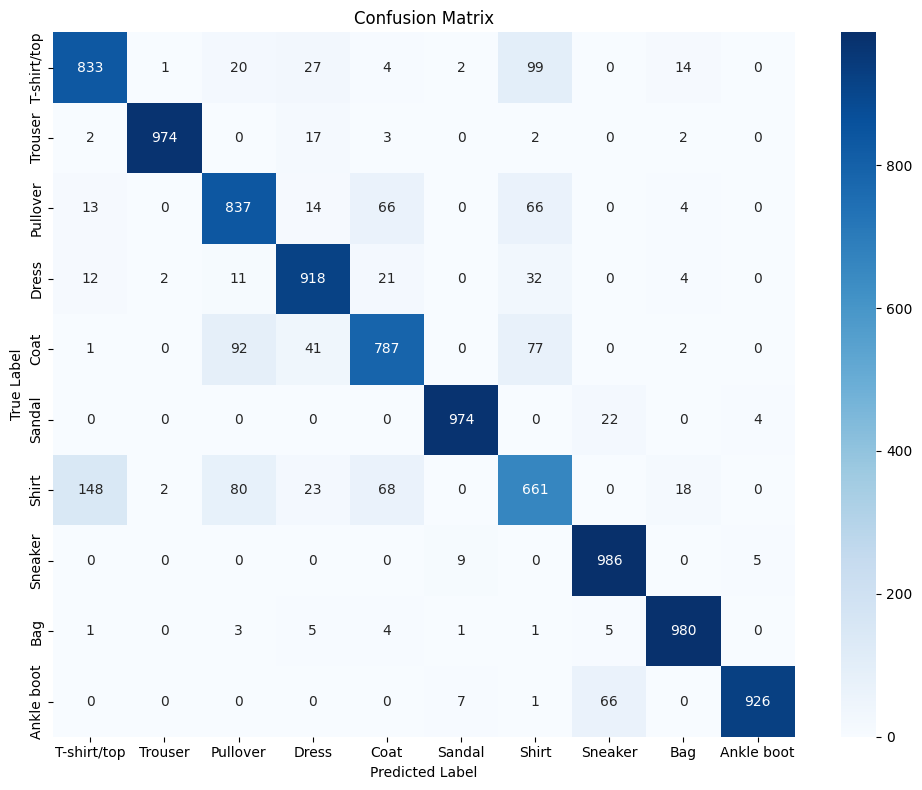

In [ ]:
# Confusion matrix for logistic regression
cm = confusion_matrix(y_test_labels, y_pred_classes)

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
!wget https://raw.githubusercontent.com/USERNAME/REPO/BRANCH/path/to/helper_functions.py
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2025-06-10 10:15:15--  https://raw.githubusercontent.com/USERNAME/REPO/BRANCH/path/to/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-10 10:15:15 ERROR 404: Not Found.

--2025-06-10 10:15:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-06-10 10:15:16 (7

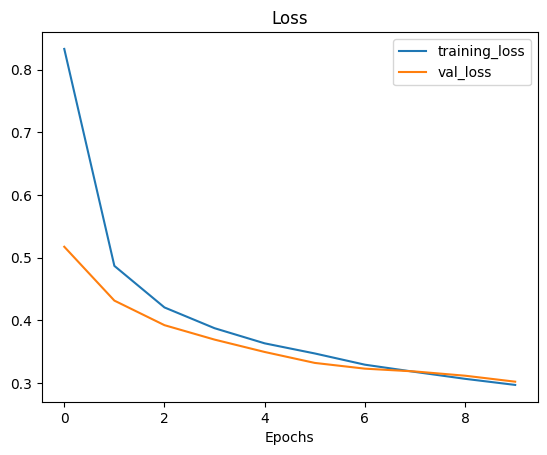

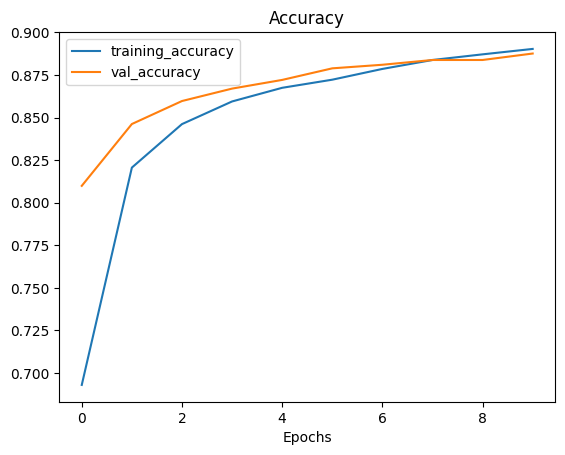

In [ ]:
plot_loss_curves(history)

In [ ]:
!pip install keras-tuner

2nd model

In [ ]:
import keras_tuner as kt
from kerastuner.tuners import RandomSearch
from tensorflow import keras

In [ ]:
# 🔹 1. Data Preprocessing (Do this ONCE)
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Set random seeds for complete reproducibility
np.random.seed(42)
tf.random.set_seed(42)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_train.shape[1]


In [ ]:
# 🔹 2. Model Builder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Choice('conv1_filters', [16, 32, 64]),  # was 30
        kernel_size=hp.Choice('conv1_kernel', [3, 5]),     # was (5, 5)
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(
        filters=hp.Choice('conv2_filters', [16, 32, 64]),  # was 15
        kernel_size=hp.Choice('conv2_kernel', [3, 5]),     # was (3, 3)
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=hp.Choice('dense_1_units', [32, 64, 128]), activation='relu'))
    model.add(Dense(units=hp.Choice('dense_2_units', [64, 128, 256]), activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
# 🔹 3. Tuner
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    overwrite=True
)


# Instructions
- build model: A function that builds and compiles the Keras model

- objective: The metric to optimize. In this case, we want to maximize the validation accuracy.

- max_trials: The maximum number of hyperparameter combinations to try.

- executions_per_trial: The number of times to train the model for each combination of hyperparameters.

In [ ]:
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10,
             callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Trial 3 Complete [00h 06m 23s]
val_accuracy: 0.9897000193595886

Best val_accuracy So Far: 0.9909999966621399
Total elapsed time: 00h 29m 25s


In [ ]:
# Get the best model
best_trained_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, acc = best_trained_model.evaluate(X_test, y_test)
print("Test accuracy from best trained model:", acc)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]

# Print best hyperparameters
print("\nBest Hyperparameters:")
for param in best_hp.values:
    print(f"{param}: {best_hp.get(param)}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9892 - loss: 0.0363
Test accuracy from best trained model: 0.9909999966621399

Best Hyperparameters:
conv1_filters: 16
conv1_kernel: 3
conv2_filters: 64
conv2_kernel: 5
dense_1_units: 32
dense_2_units: 128
learning_rate: 0.001


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
print("\n=== Model Architecture ===")
best_trained_model.summary()  # Prints layer details, parameters, etc.


=== Model Architecture ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 64)       │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,138 (250.54 KB)

 Trainable params: 64,138 (250.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predicted probabilities and class indices
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get true class indices (if y_test is one-hot encoded)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



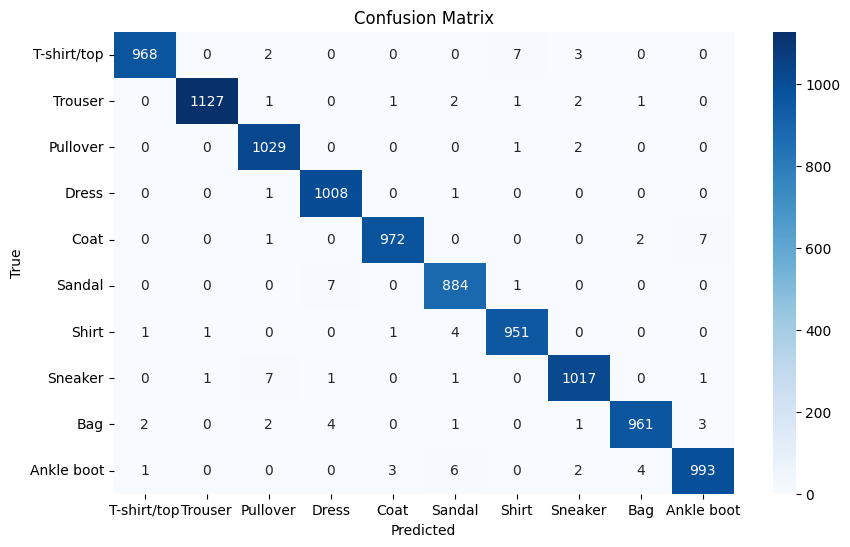

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 139ms/step - accuracy: 0.7227 - loss: 0.8689 - val_accuracy: 0.9685 - val_loss: 0.0952
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.9688 - loss: 0.1044 - val_accuracy: 0.9817 - val_loss: 0.0545
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 169ms/step - accuracy: 0.9796 - loss: 0.0675 - val_accuracy: 0.9850 - val_loss: 0.0440
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 73s 139ms/step - accuracy: 0.9833 - loss: 0.0548 - val_accuracy: 0.9859 - val_loss: 0.0371
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.9870 - loss: 0.0427 - val_accuracy: 0.9885 - val_loss: 0.0338
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9898 - val_loss: 0.0294
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9896 - val_loss: 0.0306
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.9914 - loss: 0

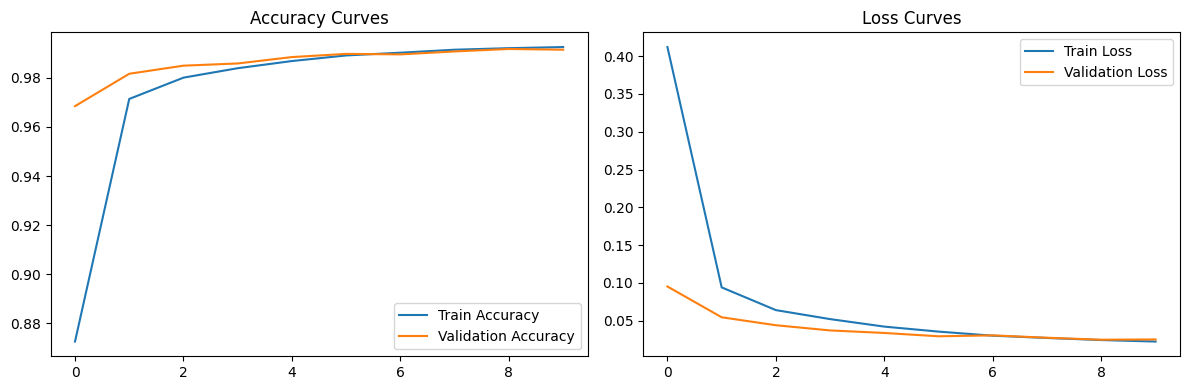

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Rebuild best model with same hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

# Train with history callback using YOUR parameters
history2 = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Using your specified 10 epochs
    batch_size=200,  # Using your specified batch size
    callbacks=[
        EarlyStopping(
            monitor='val_accuracy',  # Monitor validation accuracy
            patience=2,  # Stop after 2 epochs without improvement
            restore_best_weights=True  # Restore weights from best epoch
        )
    ]
)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

# Plot learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.legend()

plt.tight_layout()
plt.show()

--2025-06-10 12:58:33--  https://raw.githubusercontent.com/USERNAME/REPO/BRANCH/path/to/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-10 12:58:34 ERROR 404: Not Found.

--2025-06-10 12:58:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.4’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-06-10 12:58:35 (9

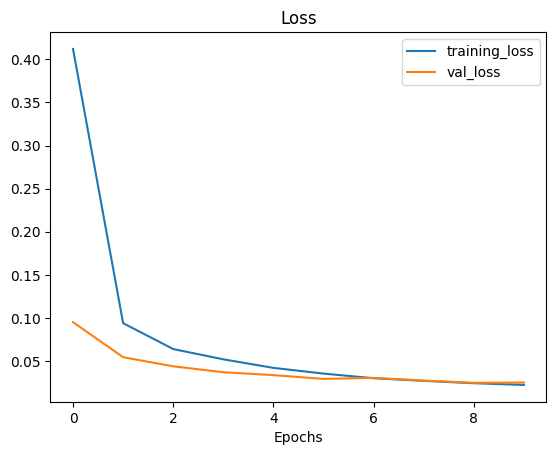

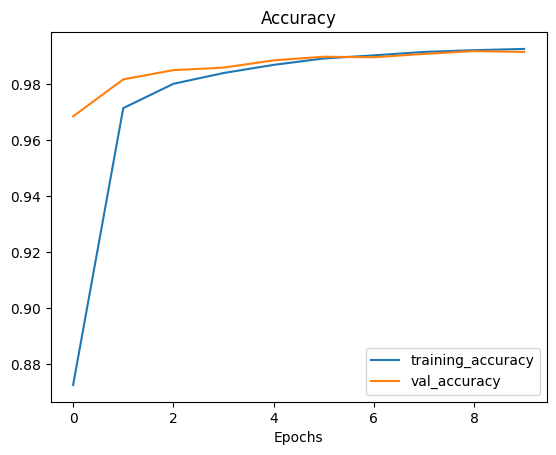

In [ ]:
!wget https://raw.githubusercontent.com/USERNAME/REPO/BRANCH/path/to/helper_functions.py
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

plot_loss_curves(history)

Training data = your flashcards

1 epoch = looking at all flashcards once

Batch = how many you look at before taking a break

Training for 10 epochs = going through the whole deck 10 times to learn better